## MNIST dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random

(60000, 28, 28)
(1263, 784)
(1263,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


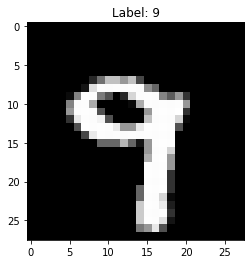

In [13]:
# Loading MNIST from keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Printing a random sample
print(x_train.shape)
b = random.randint(0, x_train.shape[0])
plt.figure()
plt.title("Label: " + str(y_train[b]))
plt.imshow(x_train[b],cmap = 'gray')

Input = []
Expected_Output = []
# Keeping only 0 and 1
for i in range(6000):
  if y_train[i] <= 1:
    Input.append(x_train[i])
    Expected_Output.append(y_train[i])

# Reshaping for 1D input vector
Input = np.array(Input).reshape(-1, 28*28)
Input = Input / np.linalg.norm(Input, axis = 0)
Expected_Output = np.array(Expected_Output)
print(Input.shape)
print(Expected_Output.shape)

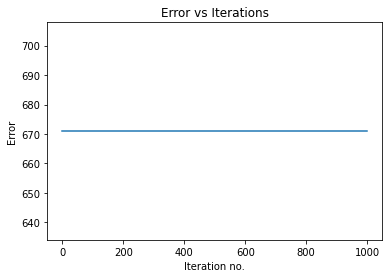

In [16]:
# Initial Weights
Weights = np.random.randn(784)
bias = random.random()

# Number of times to iterate through all training samples and update the weights
num_iters = 1000
threshold = 0
history = []
lr = 0.01

# Training

for _ in range(num_iters):
  history.append(0)
  for i in range(len(Input)):

    # Calculating output with current weights
    sum = np.dot(Input[i],Weights) + bias
    Calculated_Output = sum > threshold

    # Calculating error
    Error = Expected_Output[i] - Calculated_Output

    # Keeping a history of error
    history[-1] += abs(Error)

    # Updating weights
    Weights = Weights + lr*Error*Input[i]
    bias = bias + lr*Error

# Checking Final Output
Final_Output = np.zeros(len(Input))

for i in range(len(Input)):
  sum = np.dot(Input[i],Weights)
  Calculated_Output = sum > threshold
  Final_Output[i] = Calculated_Output

plt.plot(history)
plt.title("Error vs Iterations")
plt.xlabel("Iteration no.")
plt.ylabel("Error")
plt.show()